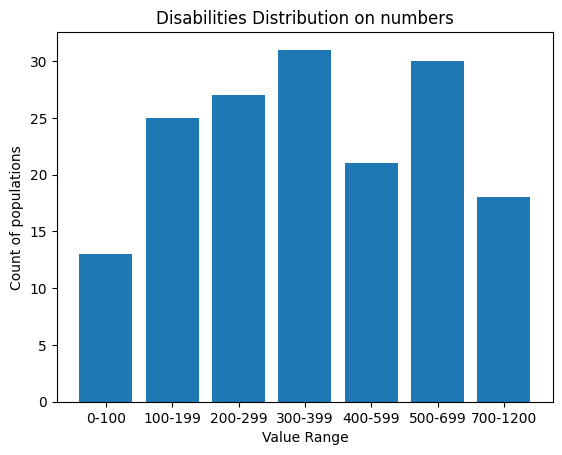

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907,"POLYGON ((-71.08997 42.34393, -71.09020 42.343..."
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171,"POLYGON ((-71.08580 42.34334, -71.08505 42.342..."
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078,"POLYGON ((-71.07251 42.35546, -71.07230 42.355..."
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044,"POLYGON ((-71.07066 42.35186, -71.07046 42.351..."
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637,"POLYGON ((-71.10114 42.34777, -71.10087 42.347..."


In [35]:
import pandas as pd
from folium import plugins, Map, CircleMarker
from folium.plugins import HeatMap , TagFilterButton
import geopandas as gpd
import folium
import geopy
import asyncio
from shapely.geometry import Polygon, Point
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

data2 = pd.read_csv('../data/Climate_Ready_Boston_Social_Vulnerability.csv')
df = pd.DataFrame(data2)
df.head()


bins = [0, 100,200, 300, 400, 500, 700, 1000]
labels = ['0-100','100-199','200-299', '300-399','400-599', '500-699', '700-1200']

# 将数字分段，并将结果添加到 DataFrame 中
data2['category'] = pd.cut(df['TotDis'], bins=bins, labels=labels)

# 按照 category 列进行分组，统计各个分段的数量
grouped = data2.groupby('category').size().reset_index(name='count')

# 绘制柱状图
plt.bar(grouped['category'], grouped['count'])
plt.xlabel('Value Range')
plt.ylabel('Count of populations')
plt.title('Disabilities Distribution on numbers')
plt.show()

sidewalks = gpd.read_file('../data/shape/Vulnerability.geojson')
sidewalks.head()

# def style_function(feature):
#     number = feature['properties']['TotDis']

# data.add_to(map)

# map.save("maps/Sidewalks_hazards_disability.html")

In [83]:

sidewalks = gpd.read_file('../data/shape/Vulnerability.geojson')
print(sidewalks[['GEOID10']])
df=pd.read_csv('../data/Climate_Ready_Boston_Social_Vulnerability.csv')
map = folium.Map(location=[42.361145, -71.057083],zoom_start = 30)
# data = folium.GeoJson(sidewalks['geometry'], name='Sidewalks', overlay=False)

#输入一个在0-1000+之内的数字，返回一个由蓝变红的颜色字符串
def style_function(number):
    normalized_number = float(number) / 1000

    red = int(normalized_number * 255)
    blue = 255 - red

    # 返回颜色字符串，格式为RGB
    color_string = f'rgb({red},0,{blue})'

    return color_string  # 返回颜色字符串，格式为RGB


for sidewalk in range(0, len(sidewalks)):
    TotDis = sidewalks.iloc[sidewalk]['TotDis']
    string = "TotDis: "+str(TotDis)
    color = style_function(TotDis)
    choropleth = folium.Choropleth(
        geo_data=sidewalks.iloc[sidewalk]['geometry'],  # 地理数据
        fill_color=color,  # 颜色映射
        fill_opacity=0.6,  # 颜色透明度
        line_opacity=0.8,  # 边界线透明度
        overlay=False,  # 是否作为覆盖图层
        tooltip=folium.features.GeoJsonTooltip(
            fields=['Tot'],
            text=string
            )
        ).add_to(map)

# data.add_to(map)


map.save("maps/Sidewalks_hazards_disability.html")

         GEOID10
0    25025010405
1    25025010404
2    25025010801
3    25025010702
4    25025010204
..           ...
175  25025081800
176  25025081700
177  25025081500
178  25025081400
179  25025081300

[180 rows x 1 columns]
